**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [146]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import metrics
from sklearn import datasets
from sklearn.neighbors import KDTree
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [147]:
%%pycodestyle


class MyKNeighborsClassifier(
    NeighborsBase,
    KNeighborsMixin,
    SupervisedIntegerMixin,
    ClassifierMixin
):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.train_x = np.array(X)
        self.train_y = np.array(y).astype(int)
        self.number_of_classes = np.unique(self.train_y).shape[0]
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.train_x)

    def predict(self, X):
        if self.algorithm == 'kd_tree':
            (_, neighbors) = self.tree.query(X, self.n_neighbors)
            return np.apply_along_axis(
                lambda x: np.bincount(x).argmax(),
                1,
                self.train_y[neighbors].astype(int))
        else:
            distances = metrics.pairwise_distances(X.astype(float),
                                                   self.train_x)
            indexes = distances.argpartition(
                self.n_neighbors)[:, :self.n_neighbors]
            return np.apply_along_axis(
                lambda x: np.bincount(x).argmax(),
                1,
                self.train_y[indexes].astype(int))

    def predict_proba(self, X):
        if self.algorithm == 'kd_tree':
            (_, neighbors) = self.tree.query(X, self.n_neighbors)
            return np.apply_along_axis(
                lambda x: np.bincount(
                    x,
                    minlength=self.number_of_classes) / self.n_neighbors,
                1,
                self.train_y[neighbors].astype(int))
        else:
            distances = metrics.pairwise_distances(X.astype(float),
                                                   self.train_x)
            indexes = distances.argpartition(
                self.n_neighbors)[:, :self.n_neighbors]
            return np.apply_along_axis(
                lambda x: np.bincount(
                    x,
                    minlength=self.number_of_classes) / self.n_neighbors,
                1,
                self.train_y[indexes].astype(int))

    def score(self, X, y):
        return (self.predict(X) == y).mean()

**IRIS**

In [148]:
iris = datasets.load_iris()

In [149]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [150]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [151]:
%time clf.fit(X_train, y_train)

CPU times: user 4.04 ms, sys: 21 µs, total: 4.06 ms
Wall time: 2.47 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [152]:
%time my_clf.fit(X_train, y_train)

CPU times: user 655 µs, sys: 3 µs, total: 658 µs
Wall time: 420 µs


In [153]:
%time clf.predict(X_test)

CPU times: user 3.58 ms, sys: 0 ns, total: 3.58 ms
Wall time: 2.66 ms


array([2, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0])

In [154]:
%time my_clf.predict(X_test)

CPU times: user 5.59 ms, sys: 8 µs, total: 5.6 ms
Wall time: 3.21 ms


array([2, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0])

In [155]:
%time clf.predict_proba(X_test)

CPU times: user 4.39 ms, sys: 23 µs, total: 4.41 ms
Wall time: 2.76 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [156]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.83 ms, sys: 0 ns, total: 1.83 ms
Wall time: 1.14 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [157]:
clf.score(X_test, y_test)

0.9333333333333333

In [158]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

Best score = {0} with numbers of n_neighbors= {1} 0.9780000000000001 15


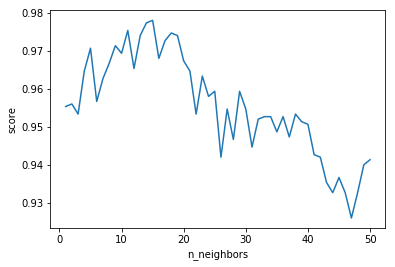

In [159]:
max_neighbors = 50
number_of_tests = 100
results = []
for i in range(1, max_neighbors + 1):
    tests_results = []
    for j in range(number_of_tests):
        X_train, X_test, y_train, y_test = \
            train_test_split(iris.data, iris.target,
                             test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        tests_results += [my_clf.score(X_test, y_test)]
    results += [np.mean(tests_results)]
print("Best score = {0} with numbers of n_neighbors= {1}",
    max(results), np.argmax(results) + 1)
plt.plot(range(1, max_neighbors + 1), results)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

**MNIST**

In [160]:
mnist = fetch_mldata('MNIST original')

In [161]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [162]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [163]:
%time clf.fit(X_train, y_train)

CPU times: user 31.2 s, sys: 164 ms, total: 31.4 s
Wall time: 31.3 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [164]:
%time my_clf.fit(X_train, y_train)

CPU times: user 15.6 ms, sys: 28.1 ms, total: 43.7 ms
Wall time: 10.6 ms


In [165]:
%time clf.predict(X_test)

CPU times: user 1min 39s, sys: 7.73 ms, total: 1min 39s
Wall time: 1min 38s


array([4., 8., 1., 4., 8., 0., 7., 2., 3., 5., 7., 7., 2., 0., 6., 0., 1.,
       9., 0., 6., 2., 3., 0., 4., 8., 6., 6., 6., 1., 8., 1., 7., 0., 1.,
       6., 9., 0., 2., 2., 2., 8., 4., 7., 0., 7., 3., 3., 1., 9., 1., 7.,
       7., 4., 5., 6., 1., 0., 1., 6., 1., 0., 5., 8., 2., 1., 1., 8., 2.,
       4., 9., 3., 5., 1., 6., 6., 2., 4., 1., 0., 4., 1., 8., 1., 0., 1.,
       0., 7., 4., 8., 5., 6., 8., 1., 1., 3., 5., 3., 1., 0., 5., 8., 7.,
       1., 3., 9., 3., 2., 2., 9., 9., 5., 4., 9., 2., 6., 3., 6., 5., 3.,
       0., 2., 5., 8., 9., 3., 5., 9., 9., 4., 3., 6., 6., 8., 3., 4., 3.,
       3., 2., 3., 6., 5., 9., 2., 2., 2., 8., 4., 0., 7., 3., 0., 1., 7.,
       4., 5., 1., 7., 9., 0., 9., 6., 8., 3., 3., 8., 9., 7., 7., 1., 3.,
       2., 6., 9., 7., 4., 7., 1., 7., 8., 5., 1., 4., 5., 9., 4., 4., 9.,
       0., 2., 5., 1., 6., 5., 2., 7., 4., 3., 9., 7., 7., 7., 3., 1., 5.,
       0., 8., 6., 4., 4., 6., 0., 0., 1., 3., 4., 3., 4., 2., 9., 5., 1.,
       1., 0., 6., 8., 1.

In [166]:
%time my_clf.predict(X_test)

CPU times: user 6.12 s, sys: 536 ms, total: 6.65 s
Wall time: 2.42 s


array([4, 8, 1, 4, 8, 0, 7, 2, 3, 5, 7, 7, 2, 0, 6, 0, 1, 9, 0, 6, 2, 3,
       0, 4, 8, 6, 6, 6, 1, 8, 1, 7, 0, 1, 6, 9, 0, 2, 2, 2, 8, 4, 7, 0,
       7, 3, 3, 1, 9, 1, 7, 7, 4, 5, 6, 1, 0, 1, 6, 1, 0, 5, 8, 2, 1, 1,
       8, 2, 4, 9, 3, 5, 1, 6, 6, 2, 4, 1, 0, 4, 1, 8, 1, 0, 1, 0, 7, 4,
       8, 5, 6, 8, 1, 1, 3, 5, 3, 1, 0, 5, 8, 7, 1, 3, 9, 3, 2, 2, 9, 9,
       5, 4, 9, 2, 6, 3, 6, 5, 3, 0, 2, 5, 8, 9, 3, 5, 9, 9, 4, 3, 6, 6,
       8, 3, 4, 3, 3, 2, 3, 6, 5, 9, 2, 2, 2, 8, 4, 0, 7, 3, 0, 1, 7, 4,
       5, 1, 7, 9, 0, 9, 6, 8, 3, 3, 8, 9, 7, 7, 1, 3, 2, 6, 9, 7, 4, 7,
       1, 7, 8, 5, 1, 4, 5, 9, 4, 4, 9, 0, 2, 5, 1, 6, 5, 2, 7, 4, 3, 9,
       7, 7, 7, 3, 1, 5, 0, 8, 6, 4, 4, 6, 0, 0, 1, 3, 4, 3, 4, 2, 9, 5,
       1, 1, 0, 6, 8, 1, 3, 6, 2, 9, 7, 8, 7, 6, 3, 1, 3, 1, 5, 9, 5, 3,
       7, 8, 7, 8, 5, 6, 3, 5, 9, 6, 7, 0, 5, 3, 1, 3, 1, 6, 3, 5, 8, 4,
       8, 0, 4, 7, 9, 2, 5, 0, 2, 4, 1, 7, 7, 0, 4, 9, 0, 0, 3, 0, 2, 9,
       1, 2, 6, 4, 6, 6, 4, 4, 3, 9, 4, 9, 4, 3, 7,

In [167]:
%time clf.predict_proba(X_test)

CPU times: user 1min 27s, sys: 0 ns, total: 1min 27s
Wall time: 1min 27s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
%time my_clf.predict_proba(X_test)

CPU times: user 5.89 s, sys: 452 ms, total: 6.34 s
Wall time: 2.3 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [169]:
clf.score(X_test, y_test)

0.9657142857142857

In [170]:
my_clf.score(X_test, y_test)

0.9657142857142857

Задание 4

In [171]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [172]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [173]:
%time clf.fit(X_train, y_train)

CPU times: user 30.9 s, sys: 196 ms, total: 31.1 s
Wall time: 31.1 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [174]:
%time my_clf.fit(X_train, y_train)

CPU times: user 30.5 s, sys: 200 ms, total: 30.7 s
Wall time: 30 s


In [175]:
%time clf.predict(X_test)

CPU times: user 1min 27s, sys: 3.85 ms, total: 1min 27s
Wall time: 1min 27s


array([0., 7., 6., 6., 2., 0., 6., 5., 8., 3., 8., 4., 1., 4., 7., 1., 3.,
       1., 6., 2., 5., 7., 6., 2., 2., 8., 6., 6., 9., 9., 6., 2., 3., 4.,
       0., 0., 8., 9., 8., 2., 7., 3., 6., 1., 7., 6., 0., 2., 0., 8., 2.,
       1., 5., 4., 2., 8., 0., 5., 0., 1., 8., 1., 5., 6., 6., 9., 8., 6.,
       9., 9., 0., 3., 3., 9., 7., 8., 2., 4., 2., 7., 4., 0., 0., 0., 2.,
       5., 1., 9., 7., 6., 7., 1., 7., 9., 5., 6., 0., 3., 5., 0., 9., 8.,
       3., 9., 1., 3., 9., 7., 8., 1., 9., 2., 4., 9., 7., 4., 3., 4., 3.,
       8., 2., 8., 7., 4., 3., 5., 0., 4., 5., 0., 7., 4., 7., 1., 7., 0.,
       6., 5., 7., 0., 8., 4., 2., 6., 5., 3., 1., 3., 3., 1., 7., 7., 7.,
       4., 0., 5., 3., 4., 3., 2., 1., 1., 7., 6., 3., 4., 9., 9., 0., 7.,
       6., 5., 9., 5., 9., 8., 0., 8., 7., 6., 1., 4., 4., 7., 9., 0., 7.,
       2., 9., 3., 5., 5., 2., 2., 2., 4., 7., 9., 1., 1., 6., 4., 6., 7.,
       8., 6., 1., 9., 6., 1., 9., 3., 4., 4., 1., 5., 8., 5., 9., 2., 1.,
       6., 7., 3., 5., 9.

In [176]:
%time my_clf.predict(X_test)

CPU times: user 1min 12s, sys: 3.97 ms, total: 1min 12s
Wall time: 1min 12s


array([0, 7, 6, 6, 2, 0, 6, 5, 8, 3, 8, 4, 1, 4, 7, 1, 3, 1, 6, 2, 5, 7,
       6, 2, 2, 8, 6, 6, 9, 9, 6, 2, 3, 4, 0, 0, 8, 9, 8, 2, 7, 3, 6, 1,
       7, 6, 0, 2, 0, 8, 2, 1, 5, 4, 2, 8, 0, 5, 0, 1, 8, 1, 5, 6, 6, 9,
       8, 6, 9, 9, 0, 3, 3, 9, 7, 8, 2, 4, 2, 7, 4, 0, 0, 0, 2, 5, 1, 9,
       7, 6, 7, 1, 7, 9, 5, 6, 0, 3, 5, 0, 9, 8, 3, 9, 1, 3, 9, 7, 8, 1,
       9, 2, 4, 9, 7, 4, 3, 4, 3, 8, 2, 8, 7, 4, 3, 5, 0, 4, 5, 0, 7, 4,
       7, 1, 7, 0, 6, 5, 7, 0, 8, 4, 2, 6, 5, 3, 1, 3, 3, 1, 7, 7, 7, 4,
       0, 5, 3, 4, 3, 2, 1, 1, 7, 6, 3, 4, 9, 9, 0, 7, 6, 5, 9, 5, 9, 8,
       0, 8, 7, 6, 1, 4, 4, 7, 9, 0, 7, 2, 9, 3, 5, 5, 2, 2, 2, 4, 7, 9,
       1, 1, 6, 4, 6, 7, 8, 6, 1, 9, 6, 1, 9, 3, 4, 4, 1, 5, 8, 5, 9, 2,
       1, 6, 7, 3, 5, 9, 1, 0, 0, 6, 7, 9, 0, 7, 6, 8, 0, 3, 7, 0, 0, 3,
       2, 7, 3, 2, 3, 4, 7, 2, 4, 0, 1, 6, 2, 8, 2, 2, 2, 8, 4, 3, 9, 1,
       9, 2, 8, 2, 6, 2, 9, 0, 6, 4, 8, 9, 5, 9, 3, 1, 9, 0, 3, 5, 1, 1,
       7, 5, 3, 9, 5, 2, 2, 7, 7, 9, 6, 0, 3, 7, 9,

In [177]:
%time clf.predict_proba(X_test)

CPU times: user 1min 26s, sys: 3.9 ms, total: 1min 26s
Wall time: 1min 26s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [178]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 12s, sys: 0 ns, total: 1min 12s
Wall time: 1min 12s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [179]:
clf.score(X_test, y_test)

0.9785714285714285

In [180]:
my_clf.score(X_test, y_test)

0.9785714285714285

Задание 5

In [181]:
# seaborn - библиотека для визуализации данных, основанная на matplotlib
# matplotlib - библиотека для визуализации данных
# train_test_split - функция из библиотеки sklearn разбивает данные на обучающую и тестовую выборки
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - конструкция для последовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) - функция, приводящая распределение к нормальному виду: среднее значение = 0, стандартное отклонение = 1
# ClassifierMixin - стандартный класс для классификатора в sklearn; имеет метод score - среднее значение точности на выборке
# NeighborsBase - базовый класс в sklearn для KNN
# KNeighborsMixin - базовый класс в sklearn для поиска ближайших соседей
# SupervisedIntegerMixin - базовый класс в sklearn, содержащий метод fit